Best cost: 961.388507293503
Customer assignments to warehouses: [4, 0, 4, 0, 2, 2, 4, 4, 2, 2, 0, 0, 2, 0, 4, 3, 1, 3, 3, 1]


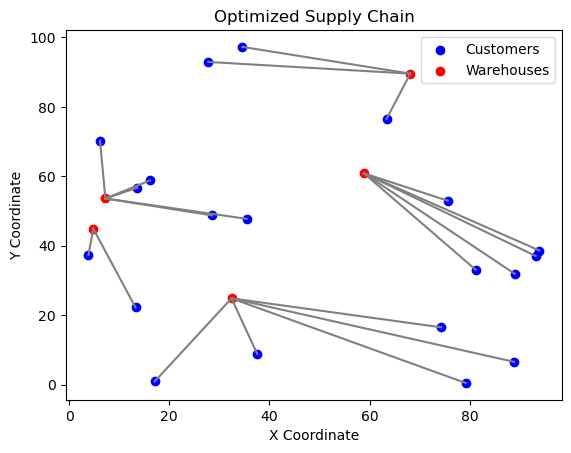

In [3]:
import numpy as np
import random
import math

# Define the problem
NUM_CUSTOMERS = 20
NUM_WAREHOUSES = 5
MAP_SIZE = 100

customers = np.random.rand(NUM_CUSTOMERS, 2) * MAP_SIZE  # Customer locations
warehouses = np.random.rand(NUM_WAREHOUSES, 2) * MAP_SIZE  # Warehouse locations
warehouse_capacities = np.random.randint(5, 10, NUM_WAREHOUSES)  # Max customers per warehouse
warehouse_operational_costs = np.random.randint(50, 100, NUM_WAREHOUSES)  # Fixed operational costs

# Parameters for Simulated Annealing
INITIAL_TEMP = 1000
FINAL_TEMP = 1
ALPHA = 0.95
MAX_ITER = 100

# Advanced cost function
def calculate_advanced_cost(warehouse_locations, assignments):
    total_cost = 0
    warehouse_loads = [0] * NUM_WAREHOUSES

    # Transportation cost
    for customer_idx, warehouse_idx in enumerate(assignments):
        distance = np.linalg.norm(customers[customer_idx] - warehouse_locations[warehouse_idx])
        total_cost += distance  # Transportation cost
        warehouse_loads[warehouse_idx] += 1  # Increment load on the assigned warehouse

    # Add warehouse operational costs
    for warehouse_idx, load in enumerate(warehouse_loads):
        total_cost += warehouse_operational_costs[warehouse_idx]  # Fixed operational cost
        if load > warehouse_capacities[warehouse_idx]:  # Overcapacity penalty
            total_cost += (load - warehouse_capacities[warehouse_idx]) * 20  # Penalty per extra customer

    return total_cost

# Generate a random initial solution
def initialize_solution():
    assignments = [random.randint(0, NUM_WAREHOUSES - 1) for _ in range(NUM_CUSTOMERS)]
    return assignments

# Generate a neighboring solution
def generate_neighbor(current_solution):
    neighbor = current_solution[:]
    customer_to_reassign = random.randint(0, NUM_CUSTOMERS - 1)
    neighbor[customer_to_reassign] = random.randint(0, NUM_WAREHOUSES - 1)
    return neighbor

# Simulated Annealing Algorithm with Metropolis Criterion
def simulated_annealing(customers, warehouses):
    current_solution = initialize_solution()
    current_cost = calculate_advanced_cost(warehouses, current_solution)
    best_solution = current_solution
    best_cost = current_cost

    temperature = INITIAL_TEMP

    while temperature > FINAL_TEMP:
        for _ in range(MAX_ITER):
            # Generate a new solution
            neighbor_solution = generate_neighbor(current_solution)
            neighbor_cost = calculate_advanced_cost(warehouses, neighbor_solution)

            # Metropolis Criterion
            delta = neighbor_cost - current_cost
            if neighbor_cost < current_cost or random.random() < math.exp(-delta / temperature):
                current_solution = neighbor_solution
                current_cost = neighbor_cost

            # Update the best solution if needed
            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        # Cool down the temperature
        temperature *= ALPHA

    return best_solution, best_cost

# Run the Simulated Annealing Algorithm
best_solution, best_cost = simulated_annealing(customers, warehouses)

# Print results
print("Best cost:", best_cost)
print("Customer assignments to warehouses:", best_solution)

# Visualize the results
import matplotlib.pyplot as plt

def plot_solution(customers, warehouses, solution):
    plt.scatter(customers[:, 0], customers[:, 1], color="blue", label="Customers")
    plt.scatter(warehouses[:, 0], warehouses[:, 1], color="red", label="Warehouses")
    for customer_idx, warehouse_idx in enumerate(solution):
        plt.plot(
            [customers[customer_idx, 0], warehouses[warehouse_idx, 0]],
            [customers[customer_idx, 1], warehouses[warehouse_idx, 1]],
            "gray",
        )
    plt.legend()
    plt.title("Optimized Supply Chain")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

plot_solution(customers, warehouses, best_solution)


In [4]:
import folium
import random
import math

# Real-world coordinates for warehouses (latitude, longitude)
warehouses = [
    (40.712776, -74.005974),  # New York
    (34.052235, -118.243683),  # Los Angeles
    (41.878113, -87.629799),  # Chicago
    (29.760427, -95.369804),  # Houston
    (33.448376, -112.074036)  # Phoenix
]

warehouse_capacities = [10, 8, 12, 9, 11]  # Example capacities
warehouse_operational_costs = [100, 120, 110, 90, 95]  # Example costs

# Randomly generate customer locations near the US
NUM_CUSTOMERS = 20
customers = [(random.uniform(25, 50), random.uniform(-125, -70)) for _ in range(NUM_CUSTOMERS)]

# Parameters for Simulated Annealing
INITIAL_TEMP = 1000
FINAL_TEMP = 1
ALPHA = 0.95
MAX_ITER = 100

# Cost function
def calculate_advanced_cost(warehouse_locations, assignments):
    total_cost = 0
    warehouse_loads = [0] * len(warehouse_locations)

    for customer_idx, warehouse_idx in enumerate(assignments):
        distance = haversine_distance(customers[customer_idx], warehouse_locations[warehouse_idx])
        total_cost += distance  # Transportation cost
        warehouse_loads[warehouse_idx] += 1  # Increment load on the assigned warehouse

    # Add operational costs and overcapacity penalties
    for warehouse_idx, load in enumerate(warehouse_loads):
        total_cost += warehouse_operational_costs[warehouse_idx]  # Fixed operational cost
        if load > warehouse_capacities[warehouse_idx]:  # Overcapacity penalty
            total_cost += (load - warehouse_capacities[warehouse_idx]) * 20  # Penalty per extra customer

    return total_cost

# Haversine distance for real-world coordinates
def haversine_distance(coord1, coord2):
    R = 6371  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

# Generate a random initial solution
def initialize_solution():
    assignments = [random.randint(0, len(warehouses) - 1) for _ in range(NUM_CUSTOMERS)]
    return assignments

# Generate a neighboring solution
def generate_neighbor(current_solution):
    neighbor = current_solution[:]
    customer_to_reassign = random.randint(0, NUM_CUSTOMERS - 1)
    neighbor[customer_to_reassign] = random.randint(0, len(warehouses) - 1)
    return neighbor

# Simulated Annealing Algorithm
def simulated_annealing(customers, warehouses):
    current_solution = initialize_solution()
    current_cost = calculate_advanced_cost(warehouses, current_solution)
    best_solution = current_solution
    best_cost = current_cost

    temperature = INITIAL_TEMP

    while temperature > FINAL_TEMP:
        for _ in range(MAX_ITER):
            neighbor_solution = generate_neighbor(current_solution)
            neighbor_cost = calculate_advanced_cost(warehouses, neighbor_solution)

            delta = neighbor_cost - current_cost
            if neighbor_cost < current_cost or random.random() < math.exp(-delta / temperature):
                current_solution = neighbor_solution
                current_cost = neighbor_cost

            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        temperature *= ALPHA

    return best_solution, best_cost

# Run Simulated Annealing
best_solution, best_cost = simulated_annealing(customers, warehouses)

# Print results
print("Best cost:", best_cost)
print("Customer assignments to warehouses:", best_solution)

# Visualize the solution on a real map
def plot_solution_on_map(customers, warehouses, solution):
    map_center = (37.0902, -95.7129)  # Center of the US
    supply_chain_map = folium.Map(location=map_center, zoom_start=5)

    # Add warehouses to the map
    for i, (lat, lon) in enumerate(warehouses):
        folium.Marker(location=(lat, lon), popup=f"Warehouse {i}", icon=folium.Icon(color="red")).add_to(supply_chain_map)

    # Add customers to the map
    for i, (lat, lon) in enumerate(customers):
        folium.Marker(location=(lat, lon), popup=f"Customer {i}", icon=folium.Icon(color="blue")).add_to(supply_chain_map)

        # Draw lines from customers to assigned warehouses
        warehouse_idx = solution[i]
        folium.PolyLine([(lat, lon), warehouses[warehouse_idx]], color="gray").add_to(supply_chain_map)

    return supply_chain_map

# Generate and show the map
supply_chain_map = plot_solution_on_map(customers, warehouses, best_solution)
supply_chain_map.save("supply_chain_map.html")
print("Map saved as 'supply_chain_map.html'. Open it in a browser.")


Best cost: 15043.401000196982
Customer assignments to warehouses: [2, 2, 1, 3, 2, 1, 2, 4, 3, 2, 3, 3, 4, 0, 1, 2, 1, 2, 0, 1]
Map saved as 'supply_chain_map.html'. Open it in a browser.
